In [8]:
%matplotlib inline


In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image
def gaussian(sigma):
    #Imatge=obrirImatge("human.png")
    masksize=6*sigma+1 
    Igaussian=[[masksize]*masksize for x in range(masksize)]
    x0=float(masksize)/2.0
    y0=float(masksize)/2.0
    for x in range (0, masksize):
        for y in range (0, masksize):
            esquer=(((x-x0)**2)/(2*(sigma**2)))
            dret=(((y-y0)**2)/(2*(sigma**2)))
            suma=esquer+dret
            Igaussian[x][y]=math.exp(-suma)

            #Igaussian[x][y]=math.exp(-(((pow((x-x0),2))/2*pow(sigma,2))+((pow((y-y0),2))/2*pow(sigma,2))))

    #plt.imshow(Imatge)
    A=1/np.sum(Igaussian)
    print (A)
    for x in range (0, masksize):
        for y in range (0, masksize):
            Igaussian[x][y]=A*Igaussian[x][y]
    plt.subplot(1,6,1)
    plt.imshow(Igaussian)
    #plt.imshow(Igaussian)
    return Igaussian

    
   

0.00197382668079


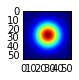

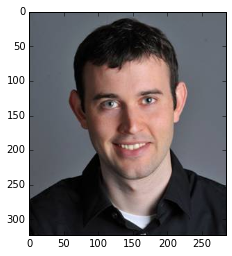

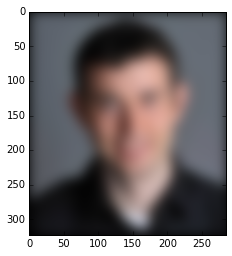

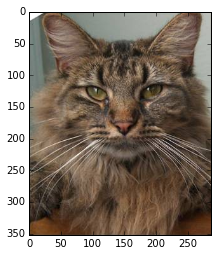

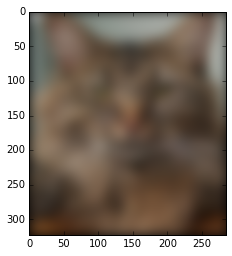

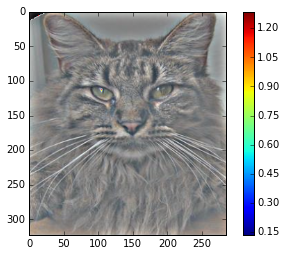

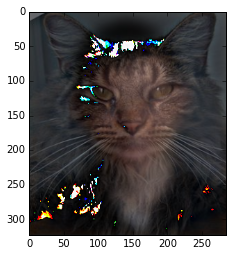

In [123]:
from scipy import signal,misc
import numpy as np
from skimage.transform import resize

def obrirImatge():
    # Passem a float
    imatgeHuman=misc.imread("human.png")/255.
    imatgeCat=misc.imread("cat.png")/255.
    
    # Escalo les imatges perque siguin del mateix tamany, el problema es que no coincideixen
    imatgeGatRe=resize(imatgeCat,(323,285), order=1, preserve_range=True)
    
    # Executo la funcio que ens crea la gaussiana
    gauss=gaussian(9)
    
    # Creem les matrius per fer el filtre amb zeros
    fitrPasaBaixHuman = np.zeros((323,285,3))
    fitrPasaAltHuman = np.zeros((323,285,3))
    fitrPasaBaixGat = np.zeros((323,285,3))
    fitrPasaAltGat = np.zeros((323,285,3))
    
    # Convoluciono les imatges per treure el pasa Baix
    fitrPasaBaixHuman[:,:,0]=signal.convolve2d(imatgeHuman[:,:,0],gauss,mode='same')
    fitrPasaBaixHuman[:,:,1]=signal.convolve2d(imatgeHuman[:,:,1],gauss,mode='same')
    fitrPasaBaixHuman[:,:,2]=signal.convolve2d(imatgeHuman[:,:,2],gauss,mode='same')
    
    fitrPasaBaixGat[:,:,0]=signal.convolve2d(imatgeGatRe[:,:,0],gauss, mode='same')
    fitrPasaBaixGat[:,:,1]=signal.convolve2d(imatgeGatRe[:,:,1],gauss, mode='same')
    fitrPasaBaixGat[:,:,2]=signal.convolve2d(imatgeGatRe[:,:,2],gauss, mode='same')
    
    # Mostrem les imatges
    plt.figure()
    plt.imshow(imatgeHuman)
    plt.figure()
    plt.imshow(fitrPasaBaixHuman)
    plt.figure()
    plt.imshow(imatgeCat)
    plt.figure()
    plt.imshow(fitrPasaBaixGat)
    
    # Fem el passa Alt del gat, restant la imatge real menys el passa baix
    fitrPasaAltGat[:,:,0]=imatgeGatRe[:,:,0]-fitrPasaBaixGat[:,:,0]
    fitrPasaAltGat[:,:,1]=imatgeGatRe[:,:,1]-fitrPasaBaixGat[:,:,1]
    fitrPasaAltGat[:,:,2]=imatgeGatRe[:,:,2]-fitrPasaBaixGat[:,:,2]
    # restar el minimo a cada canal dividit entre el maxim - el minim
    #fitrPasaAltGat[:,:,0] = fitrPasaAltGat[:,:,0] - min(de la imagen entera) / max(imagen entera) - min (imagen entera)
    
    #fitrPasaAltGat = fitrPasaAltGat
    plt.figure()
    plt.imshow(fitrPasaAltGat+0.5)
    plt.colorbar()
    
    # Mostrem les imatges, amb el tant per cent de cada una que volem
    imatgeFinal=fitrPasaBaixHuman*0.5+fitrPasaAltGat*0.5
    plt.figure()
    
    plt.imshow(imatgeFinal)

    
obrirImatge()